# Setup Notebook


In [1]:
%pylab inline
from scipy import *
from numpy.linalg import norm
from math import sqrt,sin,cos
import pandas as pd
import numpy as np
from numpy import arange,array,ones,linalg

Populating the interactive namespace from numpy and matplotlib


# Part 1: Mean Squrare Error

We considered the sample-mean estimator for the distribution mean. Another estimator for the distribution mean is the min-max-mean estimator that takes the mean (average) of the smallest and largest observed values. For example, for the sample {1, 2, 1, 5, 1}, the sample mean is (1+2+1+5+1)/5=2 while the min-max-mean is (1+5)/2=3. In this problem we ask you to run a simulation that approximates the mean squared error (MSE) of the two estimators for a uniform distribution.

Take a continuous uniform distribution between  a  and  b  - given as parameters. Draw a 10-observation sample from this distribution, and calculate the sample-mean and the min-max-mean. Repeat the experiment 100,000 times, and for each estimator calculate its average bias as your MSE estimates.


## Problem 1

For this problem, you are asked to write a function **Sample_Mean_MSE** that experimentally calculates the MSE of the sample-mean estimator for samples drawn from uniform distribution given the bounds $a$ and $b$.

<font  style="color:blue"> **Code:**</font>
```python
Sample_Mean_MSE(1,5)      
```


<font  style="color:magenta"> **Output**</font>
```
0.1343368663225577
```

**Write your code for Sample_Mean_MSE in the cell below:**

In [5]:
# modify this cell

def Sample_Mean_MSE(a,b):
    # inputs: bounds for uniform distribution a and b
    # sample size is 10
    # number of experiments is 100,000
    # output: MSE for sample mean estimator with sample size 10
    total = 0
    mean_ab = (a+b)/2
    for i in range(100000):
        sample = np.random.uniform(a, b, 10)
        total += (sample.mean() - mean_ab)**2
    return total/100000

    

In [6]:
# Check Function
assert abs(Sample_Mean_MSE(-5,5)-0.83333333333333) < 0.05
assert abs(Sample_Mean_MSE(-10,10)-3.33333333333333) < 0.05

#
# AUTOGRADER TEST - DO NOT REMOVE
#


In [8]:
Sample_Mean_MSE(1,5)

0.13379626075257833

## Problem 2

For this problem, you are asked to write a function **MinMax_Mean_MSE** that experimentally calculates the MSE of the min-max-mean estimator for samples drawn from uniform distribution given the bounds $a$ and $b$.

<font  style="color:blue"> **Code:**</font>
```python
MinMax_Mean_MSE(0,10)      
```


<font  style="color:magenta"> **Output:**</font>

0.37865973633197908

**Write your code for MinMax_Mean_MSE in the cell below:**

In [9]:
# modify this cell

def MinMax_Mean_MSE(a,b):
    # inputs: bounds for uniform distribution a and b
    # sample size is 10
    # number of experiments is 100,000
    # output: MSE for sample mean estimator with sample size 10
    total = 0
    mean_ab = (a+b)/2    #mean of a uniform distribution
    for i in range(100000):
        sample = np.random.uniform(a, b, 10)
        total += ((sample.max() + sample.min())/2 - mean_ab)**2
    return total/100000
        


In [10]:
# Check Function
assert abs(MinMax_Mean_MSE(-5,5)-0.37882324043882964) < 0.05
assert abs(MinMax_Mean_MSE(-10,10)-1.5151124438250361) < 0.05

In [14]:
MinMax_Mean_MSE(0,10)

0.38079863246225976

# Part 2: Regression

It is now your turn to try out all of the above code. For this exercise you will measure the relationship between hours studyig and student grades for a simulated dataset. Below is a scatter plot of the data.


In [15]:
data = pd.read_csv('data/hw_regression_data.csv')
print(data.shape)
data.head()

(1000, 2)


,study_hours,grades
0,32.143368,75.636962
1,27.466725,76.932627
2,21.247638,68.575996
3,33.726661,81.221442
4,36.501309,84.787467


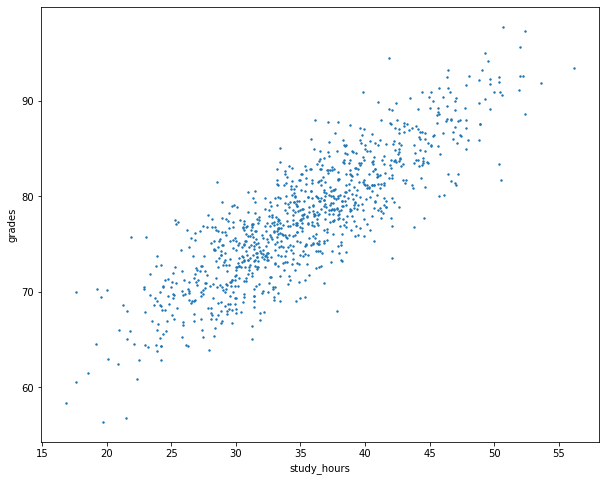

In [16]:
ax = data.plot(kind='scatter', s=2, x="study_hours", y="grades", figsize=[10,8]);

## Problem 3: Get Averages



Write a function, **get_averages**, that:
1. For all data points round the student's study hours to the nearest whole number.
2. Compute the mean grade for each rounded whole number of study hours.

The function should return a pandas dataframe of the mean grades for each existing rounded whole number. The beginning of the panda dataframe is provided for you below:

<font  style="color:blue">  **Code:** </font>
```python
grade_means = get_averages(data)

print(type(grade_means))
print(grade_means.shape)
print(grade_means.columns) 
grade_means.head()
```

<font  style="color:magenta"> **Output:**</font>
```
<class 'pandas.core.frame.DataFrame'>
(38, 1)
Index([u'grades'], dtype='object')
```
<img src="data/reg_ex_table.png"  style="width: 190px;"/>

**Write your code for get_averages in the cell below:**

In [18]:
# modify this cell

def get_averages(data):
    # input: the HW's dataset
    # output: a pandas dataframe yielding the mean grade for each rounded number of study hours
    data['study_hours'] = data['study_hours'].round()
    return data.groupby(by = 'study_hours').mean()


<ipython-input-19-d90852173a25>:10: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  try: assert sum(abs( grade_means.tail()["grades"].values - \


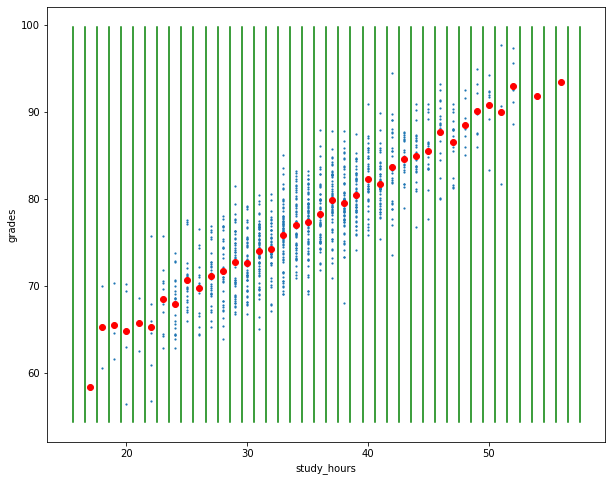

In [19]:
# check student function
grade_means = get_averages(data)

assert grade_means.shape == (38, 1)
assert str(type(grade_means)) == "<class 'pandas.core.frame.DataFrame'>"

try: assert grade_means.columns[0] == "grades"
except: raise ValueError('the column in "grade_means" must be named grades')

try: assert sum(abs( grade_means.tail()["grades"].values - \
               np.array([ 90.77739,90.02272,92.97258,91.87963,93.48365])    )) < 10**-4
except: raise ValueError('some values are incorrect in grade_means')
 

# plot Graph
ax= data.plot(kind='scatter',s=1.4,x="study_hours",y="grades",figsize=[10,8]);
grade_means.plot(y='grades',style='ro', ax=ax,legend=False)
_xlim = xlim()
_ylim =ylim()
for _x in arange(_xlim[0]+0.5,_xlim[1],1):
    plot([_x,_x],[_ylim[0],_ylim[1]],'g')

## Problem 4 Simple Linear Regression


Write a function, **do_regression**, that performs linear regression to return 
$ \;
 {\bf w} = \begin{pmatrix}
 w_0\\
 w_1
 \end{pmatrix}
$
for the equation:

$$
\text{grades}= w_0 + w_1 \cdot \text{study_hours}
$$

** *Hint* **: Use the function `linalg.lstsq` 


<font  style="color:blue"> * **Code:** *</font>
```python
w = do_regression(data)
print type(w)
print w.shape
```

<font  style="color:magenta"> * **Output:** *</font>
```
<type 'numpy.ndarray'>
(2,)
```

**Write your code for do_regression in the cell below:**

In [22]:
data = pd.read_csv('data/hw_regression_data.csv')


In [23]:
data.head()

,study_hours,grades
0,32.143368,75.636962
1,27.466725,76.932627
2,21.247638,68.575996
3,33.726661,81.221442
4,36.501309,84.787467


In [24]:
x = data['study_hours']
y = data['grades']
fit = np.polyfit(x,y,deg = 1)
fit

array([ 0.84009377, 48.06947049])

In [25]:
# modify this cell

def do_regression(data):
    # input: the HW's dataset
    # output: a numpy array yielding w=(w0,w1) from linear regression
    x = data['study_hours']
    y = data['grades']
    fit = np.polyfit(x,y,deg = 1)
    return np.array(fit[::-1])


[48.06947049  0.84009377]
14.927147671335 58.100057672765


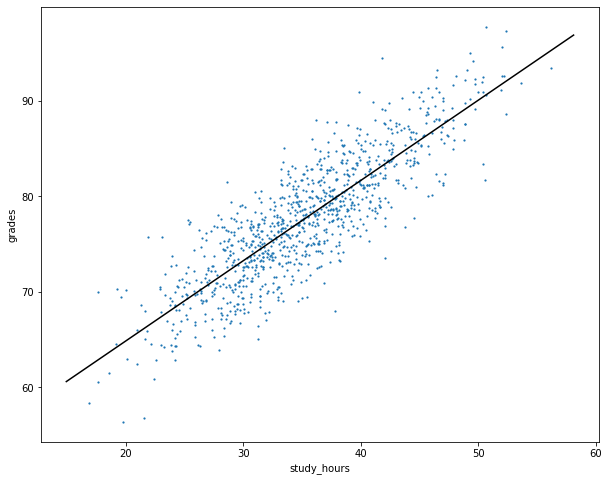

In [28]:
# check student function
def f(x, reg):
    return reg[0]+ x*reg[1]
w1_hw = do_regression(data)
assert str(type(w1_hw)) ==  "<class 'numpy.ndarray'>"
assert w1_hw.shape == (2,)
assert abs(w1_hw[0] - 48.0694704904) < 10**-5

# plot Means
print(w1_hw)
ax= data.plot(kind='scatter',s=1.4,x="study_hours",y="grades",figsize=[10,8]);
x0,x1=xlim()
print(x0, x1)
ax.plot([x0,x1],[f(x0,w1_hw),f(x1,w1_hw)],'k');

